In [1]:
import obspy as op
import numpy as np
import cartopy.crs as ccrs
from obspy.clients.fdsn import Client
import cartopy.feature as cfeature
import pandas as pd 
import cartopy.io.img_tiles as cimgt

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from matplotlib.animation import FFMpegWriter
from matplotlib.animation import FuncAnimation

import shapefile as shp
import seaborn as sns
import geopandas

from matplotlib.colors import TwoSlopeNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Clean the Data

In [2]:
def tostring (value):
    if value < 10:
        return "2020-09-0" + str(value)

    if value >= 10:
        return "2020-09-" + str(value)

In [3]:
#clean to only read in california counties with september AQIs
data_table = pd.read_csv("daily_aqi_by_county_2020.csv")
data_table = data_table[data_table["State Name"] == "California"].loc[:, ["State Name", "county Name", "Date", "AQI"]]
data_table = data_table[data_table["Date"].str.contains("2020-09")]
data_table = data_table.rename(columns={"county Name": "NAME"})

#create an array of data frames
AQI_byDate = []
max_AQI = 0 #finding max for the color bar in the graph

for i in np.arange(1,31):
    temp_table = data_table[data_table["Date"].str.contains(tostring(i))]
    AQI_byDate.append(temp_table)
    
    temp_max = max(temp_table["AQI"].tolist()) 
#     temp_min = min(temp_table["AQI"].tolist())
    
    if max_AQI < temp_max:
        max_AQI = temp_max
#     if min_AQI < temp_min:
#         min_AQI = temp_min
    
AQI_byDate[1].head(10)

State Name          NAME        Date  AQI
14391  California       Alameda  2020-09-02   62
14752  California        Amador  2020-09-02   44
15116  California         Butte  2020-09-02   84
15481  California     Calaveras  2020-09-02   77
15846  California        Colusa  2020-09-02   79
16212  California  Contra Costa  2020-09-02   62
16507  California     Del Norte  2020-09-02    7
16870  California     El Dorado  2020-09-02   74
17236  California        Fresno  2020-09-02  100
17602  California         Glenn  2020-09-02   77

# Use Geopanda to Visualize Air Qualities

Test image

<AxesSubplot:>

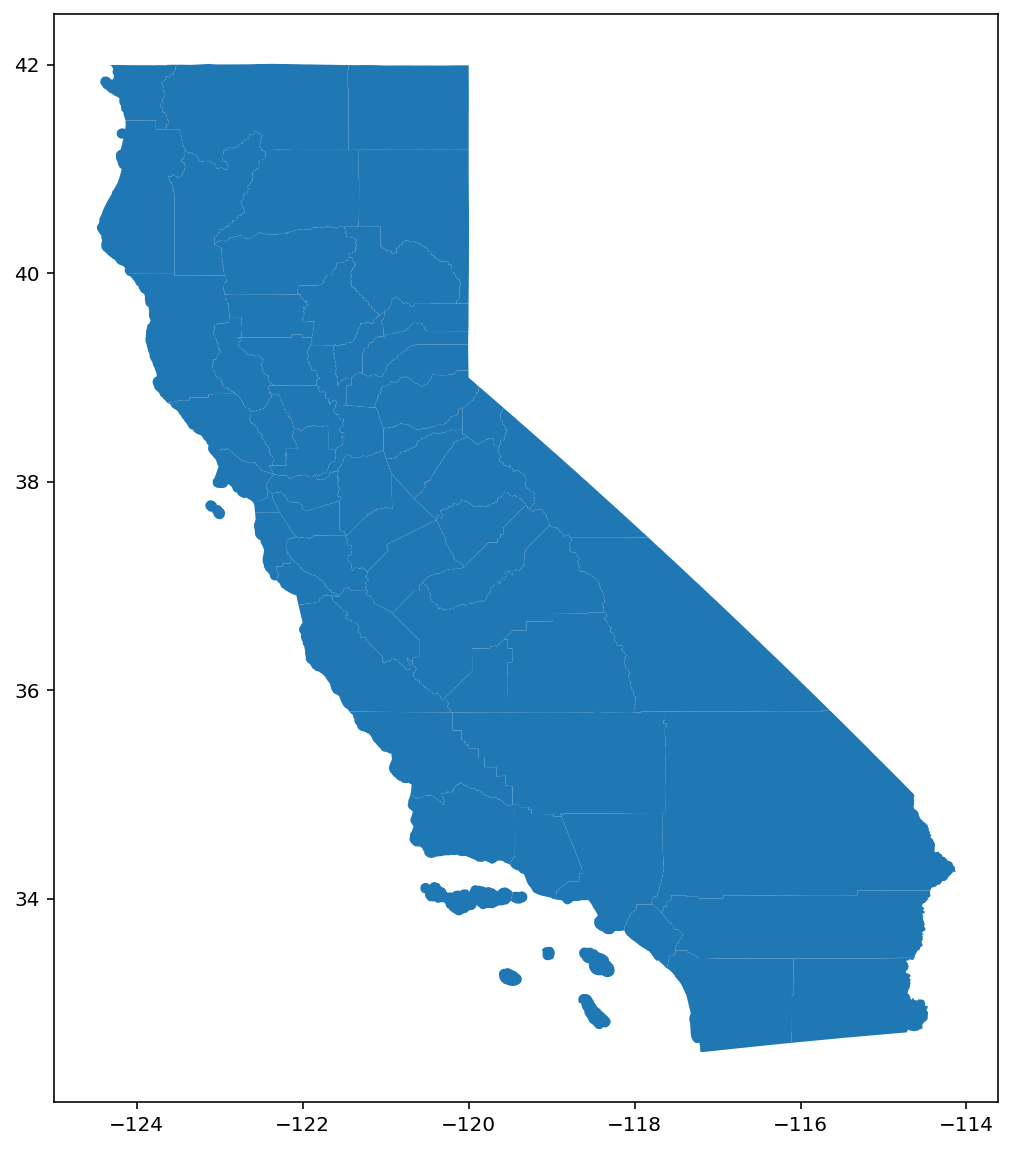

In [4]:
#CA_Counties_TIGER2016.shp
counties = geopandas.read_file("CA_Counties_TIGER2016.shp")
type(counties)
counties.head()

counties.boundary.crs
counties.to_crs(epsg=4326).plot(figsize=(15,10))

Merging the shape file data with AQI data to plot the AQI colors

In [5]:
all_merge = []

for i in np.arange(30):
    temp_table = counties.merge(AQI_byDate[i], on='NAME', how='left')
    temp_table["AQI"] = temp_table["AQI"].fillna(-20)
    all_merge.append(temp_table)

In [6]:
all_merge[1]

STATEFP COUNTYFP  COUNTYNS  GEOID             NAME                NAMELSAD  \
0       06      091  00277310  06091           Sierra           Sierra County   
1       06      067  00277298  06067       Sacramento       Sacramento County   
2       06      083  00277306  06083    Santa Barbara    Santa Barbara County   
3       06      009  01675885  06009        Calaveras        Calaveras County   
4       06      111  00277320  06111          Ventura          Ventura County   
5       06      037  00277283  06037      Los Angeles      Los Angeles County   
6       06      097  01657246  06097           Sonoma           Sonoma County   
7       06      031  00277280  06031            Kings            Kings County   
8       06      073  00277301  06073        San Diego        San Diego County   
9       06      061  00277295  06061           Placer           Placer County   
10      06      075  00277302  06075    San Francisco    San Francisco County   
11      06      041  00277285  06041            Marin            Marin County   
12      06      043  00277286  06043         Mariposa         Mariposa County   
13      06      035  01693324  06035           Lassen           Lassen County   
14      06      055  00277292  06055             Napa             Napa County   
15      06      089  01682610  06089           Shasta           Shasta County   
16      06      053  00277291  06053         Monterey         Monterey County   
17      06      105  00277317  06105          Trinity          Trinity County   
18      06      045  00277287  06045        Mendocino        Mendocino County   
19      06      027  01804637  06027             Inyo             Inyo County   
20      06      051  00277290  06051             Mono             Mono County   
21      06      109  00277319  06109         Tuolumne         Tuolumne County   
22      06      095  00277312  06095           Solano           Solano County   
23      06      071  00277300  06071   San Bernardino   San Bernardino County   
24      06      013  01675903  06013     Contra Costa     Contra Costa County   
25      06      003  01675840  06003           Alpine           Alpine County   
26      06      017  00277273  06017        El Dorado        El Dorado County   
27      06      113  00277321  06113             Yolo             Yolo County   
28      06      115  00277322  06115             Yuba             Yuba County   
29      06      069  00277299  06069       San Benito       San Benito County   
30      06      023  01681908  06023         Humboldt         Humboldt County   
31      06      065  00277297  06065        Riverside        Riverside County   
32      06      029  02054176  06029             Kern             Kern County   
33      06      011  01675902  06011           Colusa           Colusa County   
34      06      015  01682074  06015        Del Norte        Del Norte County   
35      06      049  00277289  06049            Modoc            Modoc County   
36      06      019  00277274  06019           Fresno           Fresno County   
37      06      039  00277284  06039           Madera           Madera County   
38      06      085  00277307  06085      Santa Clara      Santa Clara County   
39      06      103  01692767  06103           Tehama           Tehama County   
40      06      077  00277303  06077      San Joaquin      San Joaquin County   
41      06      001  01675839  06001          Alameda          Alameda County   
42      06      057  01682927  06057           Nevada           Nevada County   
43      06      007  01675842  06007            Butte            Butte County   
44      06      047  00277288  06047           Merced           Merced County   
45      06      107  00277318  06107           Tulare           Tulare County   
46      06      099  00277314  06099       Stanislaus       Stanislaus County   
47      06      059  00277294  06059           Orange           Orange County   
48      06      025  00277277  060

# Simulate!

In [7]:
def oneframe(value):
    all_merge[value].to_crs(epsg=4326).plot(ax=ax, column = "AQI", norm=norm, cmap = "YlOrRd")
    date = all_merge[value]["Date"][2] #pulling date from santa barbara row because there will always be a value associated
    ax.set_title("AQI by County on " + date)
    fig.show()

<ipython-input-7-ae7a563003a1>:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-7-ae7a563003a1>:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-7-ae7a563003a1>:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-7-ae7a563003a1>:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-7-ae7a563003a1>:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-7-ae7a563003a1>:5: UserWarning: Matplotlib is currently

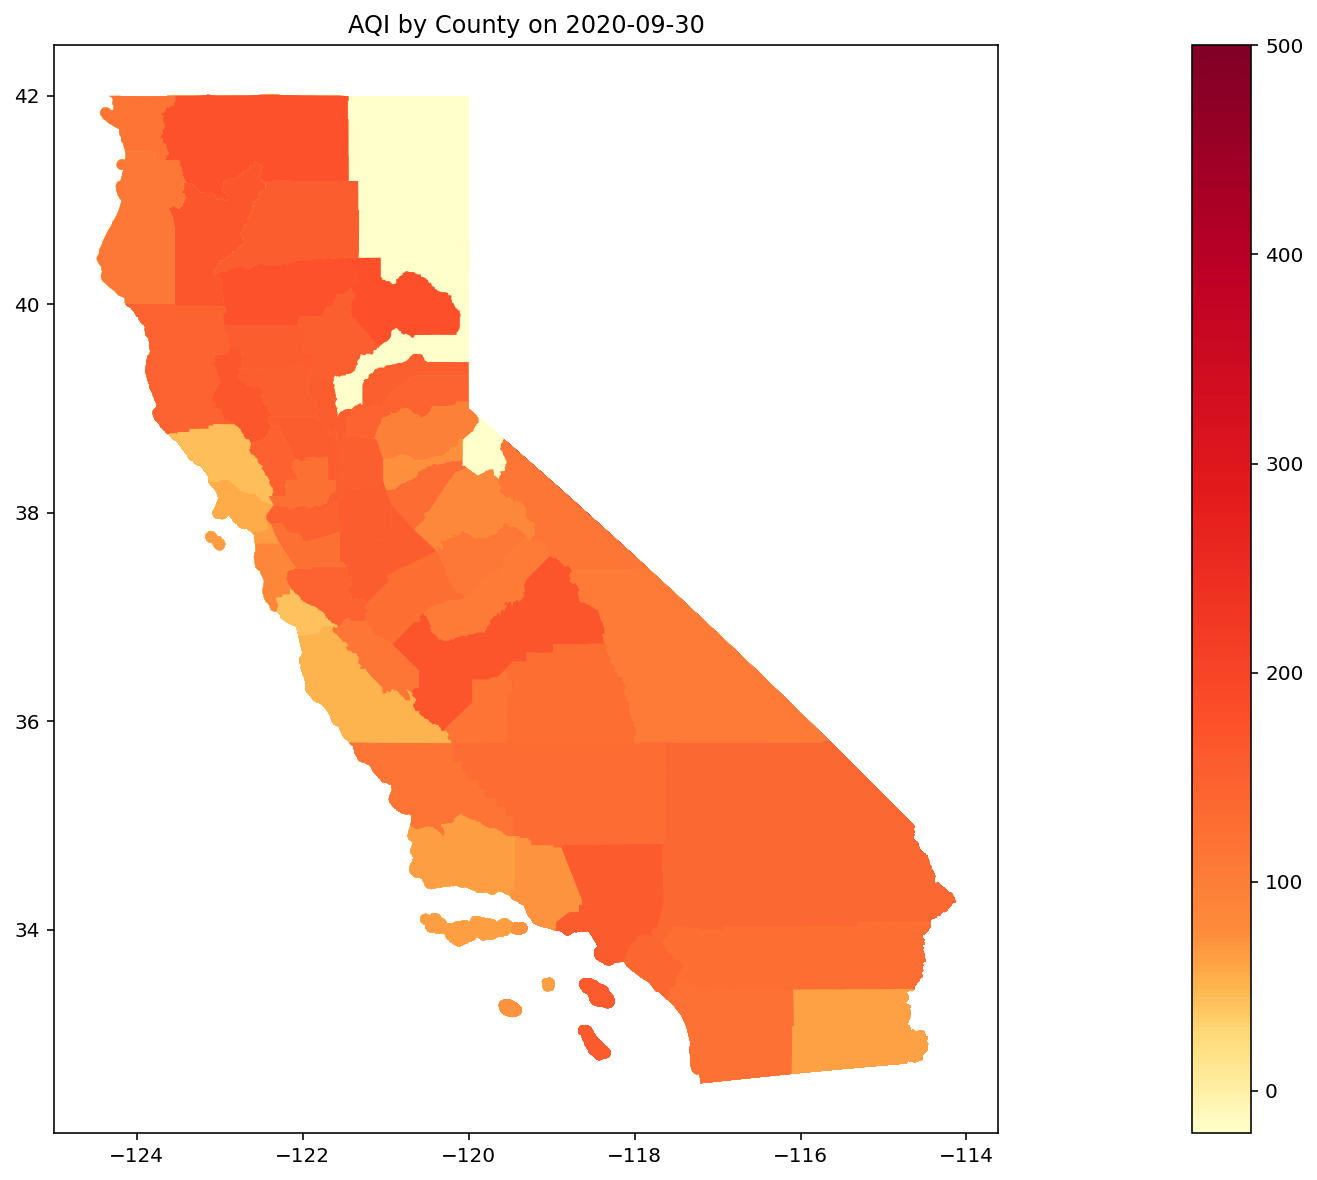

In [8]:
#fixing the values on the colorbar
vmin, vmax, vcenter = -20, 500, 75
norm = TwoSlopeNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)

metadata = dict(title='final project animation', artist='catherine')
writer = FFMpegWriter(fps=1, metadata=metadata)
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15,10))

sm = plt.cm.ScalarMappable(cmap = "YlOrRd", norm=norm)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.5)
cbar = fig.colorbar(sm, cax=cax)
#cbar.ax.tick_params(labelsize=14)

#plt.pause(0.5) # choose the time argument between 0.01 and 0.5
#writer.grab_frame()

with writer.saving(fig, "animation.mp4", dpi = 200):
    for i in range(30):
        oneframe(i)
        #plt.pause(0.5) # choose the time argument between 0.01 and 0.5
        writer.grab_frame()